In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("C://Users//MERLIN//stock//Retail_data.xlsx")

In [3]:
df

,Year,Month,Utility_Michigan,Utility_Texas,Gasoline_Michigan,Gasoline_Texas,Electricity_Michigan,Electricity_Texas
0,2000,Jan,0.520,0.571,1.374,1.296,0.097,0.071
1,2000,Feb,0.520,0.571,1.453,1.363,0.097,0.071
2,2000,Mar,0.521,0.604,1.592,1.524,0.097,0.071
3,2000,Apr,0.521,0.604,1.429,1.507,0.097,0.071
4,2000,May,0.520,0.604,1.492,1.488,0.097,0.087
...,...,...,...,...,...,...,...,...
283,2023,Aug,1.121,NaN,3.869,3.477,0.204,0.182
284,2023,Sep,1.144,NaN,3.804,3.396,0.202,0.177
285,2023,Oct,1.159,NaN,3.563,3.170,0.195,0.179
286,2023,Nov,1.169,NaN,3.403,2.888,NaN,0.178


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    Year                 288 non-null    int64  
 1   Month                 288 non-null    object 
 2   Utility_Michigan      283 non-null    float64
 3   Utility_Texas         279 non-null    float64
 4   Gasoline_Michigan     288 non-null    float64
 5   Gasoline_Texas        288 non-null    float64
 6   Electricity_Michigan  285 non-null    float64
 7   Electricity_Texas     284 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.1+ KB


In [5]:
print(df.columns)


Index([' Year ', 'Month', 'Utility_Michigan', 'Utility_Texas',
       'Gasoline_Michigan', 'Gasoline_Texas', 'Electricity_Michigan',
       'Electricity_Texas'],
      dtype='object')


In [6]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Create the 'Date' column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Drop the original 'Year' and 'Month' columns
df = df.drop(['Year', 'Month'], axis=1)

# Reorder the columns with 'Date' as the first column
cols = list(df.columns)
cols = ['Date'] + [col for col in cols if col != 'Date']
df = df[cols]

# Display the updated DataFrame
print(df)

          Date  Utility_Michigan  Utility_Texas  Gasoline_Michigan  \
0   2000-01-01             0.520          0.571              1.374   
1   2000-02-01             0.520          0.571              1.453   
2   2000-03-01             0.521          0.604              1.592   
3   2000-04-01             0.521          0.604              1.429   
4   2000-05-01             0.520          0.604              1.492   
..         ...               ...            ...                ...   
283 2023-08-01             1.121            NaN              3.869   
284 2023-09-01             1.144            NaN              3.804   
285 2023-10-01             1.159            NaN              3.563   
286 2023-11-01             1.169            NaN              3.403   
287 2023-12-01             1.166            NaN              3.131   

     Gasoline_Texas  Electricity_Michigan  Electricity_Texas  
0             1.296                 0.097              0.071  
1             1.363              

In [7]:
df.isnull().sum()

Date                    0
Utility_Michigan        5
Utility_Texas           9
Gasoline_Michigan       0
Gasoline_Texas          0
Electricity_Michigan    3
Electricity_Texas       4
dtype: int64

In [8]:
# Calculate the median for each column
median_values = df.median(numeric_only=True)

# Fill missing values with median
df = df.fillna(median_values)

# Display the updated DataFrame
print(df)


          Date  Utility_Michigan  Utility_Texas  Gasoline_Michigan  \
0   2000-01-01             0.520          0.571              1.374   
1   2000-02-01             0.520          0.571              1.453   
2   2000-03-01             0.521          0.604              1.592   
3   2000-04-01             0.521          0.604              1.429   
4   2000-05-01             0.520          0.604              1.492   
..         ...               ...            ...                ...   
283 2023-08-01             1.121          1.060              3.869   
284 2023-09-01             1.144          1.060              3.804   
285 2023-10-01             1.159          1.060              3.563   
286 2023-11-01             1.169          1.060              3.403   
287 2023-12-01             1.166          1.060              3.131   

     Gasoline_Texas  Electricity_Michigan  Electricity_Texas  
0             1.296                 0.097              0.071  
1             1.363              

## Single Exponential

**Utility_Michigan**

In [9]:
# Determine the index for splitting
split_index = int(0.8 * len(df))

# Split the data into train and test sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Single exponential smoothing
model_single = ExponentialSmoothing(train['Utility_Michigan'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_single = mean_absolute_error(test['Utility_Michigan'], predictions_single)

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['Utility_Michigan'] - predictions_single) / test['Utility_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")

Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 0.17525862060692804
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 85.2469737625969 %


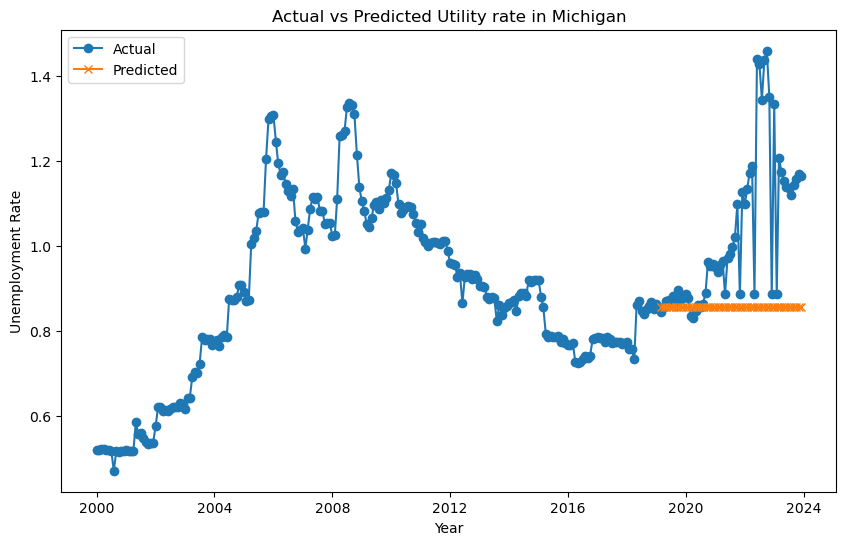

In [10]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Utility_Michigan'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Date'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Utility rate in Michigan')
plt.legend()

# Displaying the plot
plt.show()

**Utility_Texas**

In [11]:
# Determine the index for splitting (e.g., 80% for training)
split_index = int(0.8 * len(df))

# Split the data into train and test sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Single exponential smoothing
model_single = ExponentialSmoothing(train['Utility_Texas'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_single = mean_absolute_error(test['Utility_Texas'], predictions_single)

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['Utility_Texas'] - predictions_single) / test['Utility_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")

Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 0.2070689655609171
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 86.45207785046483 %


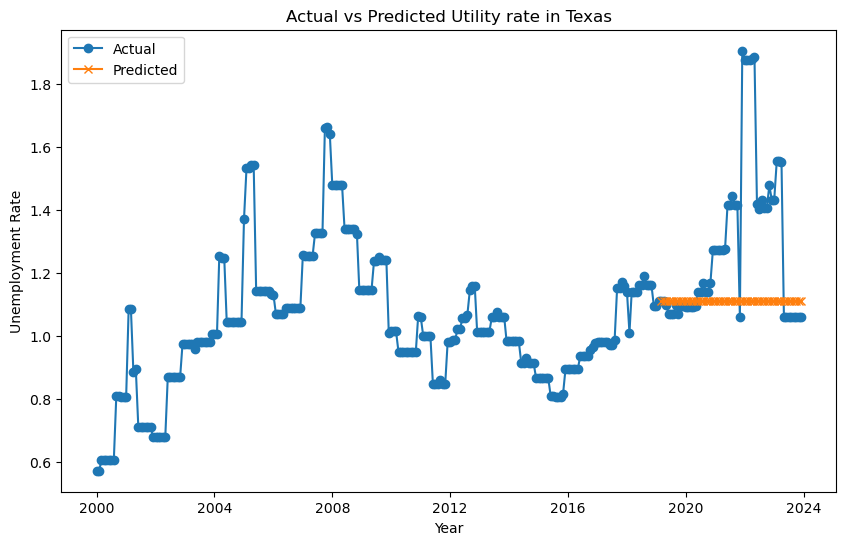

In [12]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Utility_Texas'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Date'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Utility rate in Texas')
plt.legend()

# Displaying the plot
plt.show()

**Gasoline_Michigan**

In [13]:
# Determine the index for splitting (e.g., 80% for training)
split_index = int(0.8 * len(df))

# Split the data into train and test sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Single exponential smoothing
model_single = ExponentialSmoothing(train['Gasoline_Michigan'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_single = mean_absolute_error(test['Gasoline_Michigan'], predictions_single)

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['Gasoline_Michigan'] - predictions_single) / test['Gasoline_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")

Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 0.9095172438025474
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 73.57856923549183 %


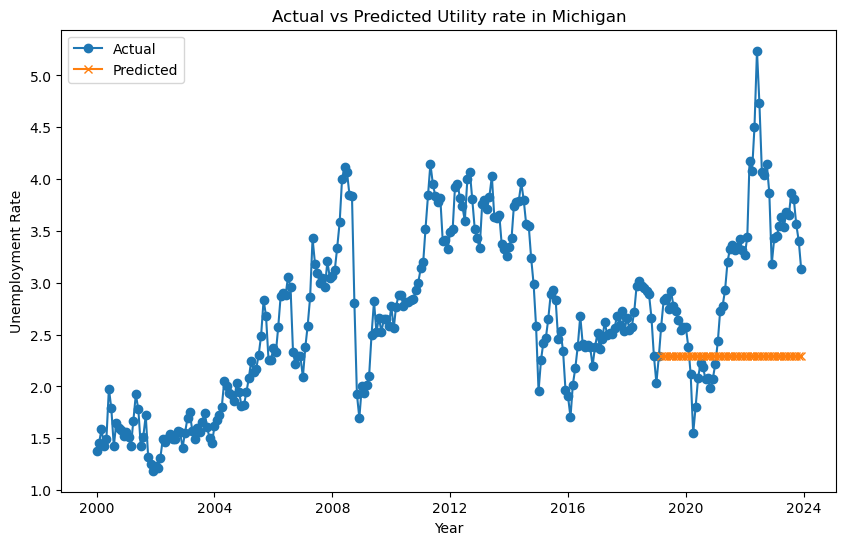

In [14]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Gasoline_Michigan'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Date'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Gasoline Utility rate in Michigan')
plt.legend()

# Displaying the plot
plt.show()

**Gasoline_Texas**

In [15]:
# Determine the index for splitting (e.g., 80% for training)
split_index = int(0.8 * len(df))

# Split the data into train and test sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Single exponential smoothing
model_single = ExponentialSmoothing(train['Gasoline_Texas'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_single = mean_absolute_error(test['Gasoline_Texas'], predictions_single)

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['Gasoline_Texas'] - predictions_single) / test['Gasoline_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")

Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 0.8320517243640183
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 72.80417261999435 %


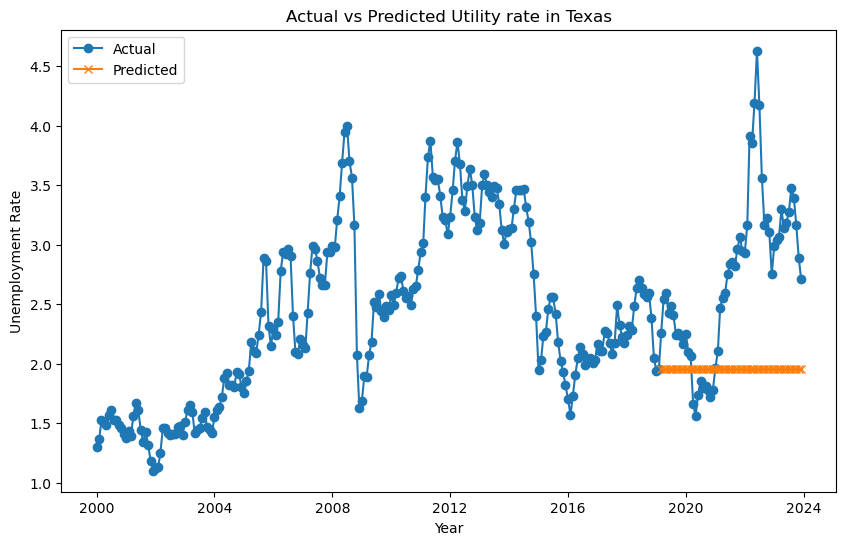

In [16]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Gasoline_Texas'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Date'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Gasoline rate in Texas')
plt.legend()

# Displaying the plot
plt.show()

**Electricity_Michigan**

In [17]:
# Determine the index for splitting (e.g., 80% for training)
split_index = int(0.8 * len(df))

# Split the data into train and test sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Single exponential smoothing
model_single = ExponentialSmoothing(train['Electricity_Michigan'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_single = mean_absolute_error(test['Electricity_Michigan'], predictions_single)

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['Electricity_Michigan'] - predictions_single) / test['Electricity_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")

Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 0.030699066346523824
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 83.18912369493303 %


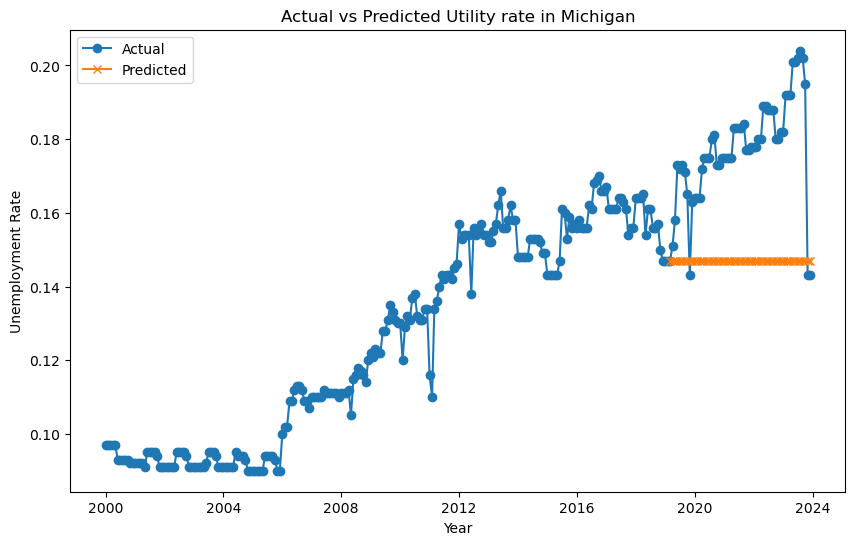

In [18]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Electricity_Michigan'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Date'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Electricity rate in Michigan')
plt.legend()

# Displaying the plot
plt.show()

**Electricity_Texas**

In [19]:
# Determine the index for splitting (e.g., 80% for training)
split_index = int(0.8 * len(df))

# Split the data into train and test sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Single exponential smoothing
model_single = ExponentialSmoothing(train['Electricity_Texas'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_single = mean_absolute_error(test['Electricity_Texas'], predictions_single)

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['Electricity_Texas'] - predictions_single) / test['Electricity_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")

Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 0.023881393152757516
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 86.29175661961854 %


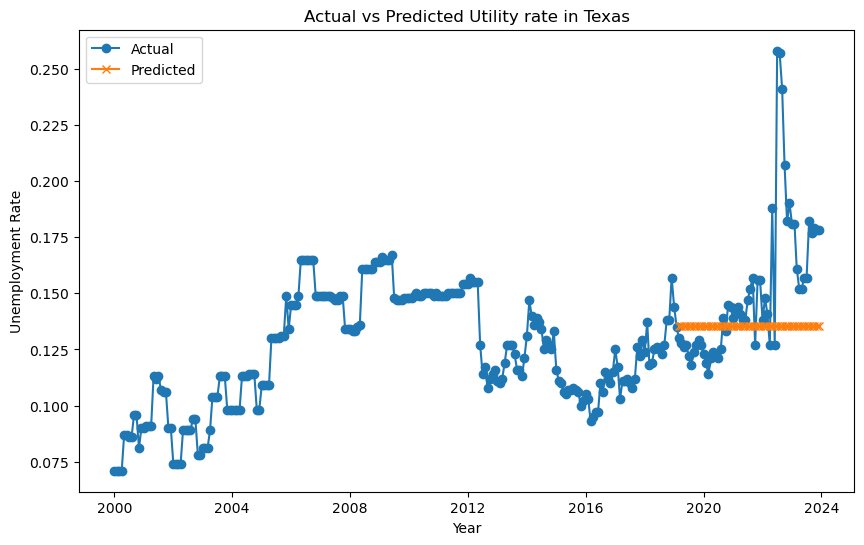

In [20]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Electricity_Texas'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Date'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Electricity rate in Texas')
plt.legend()

# Displaying the plot
plt.show()

## Double Exponential smoothening

**Utility_Michigan**

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double exponential smoothing
model_double = ExponentialSmoothing(train['Utility_Michigan'], trend='additive')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['Utility_Michigan'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['Utility_Michigan'] - predictions_double) / test['Utility_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 0.14121315136326412
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 88.19602385217388 %


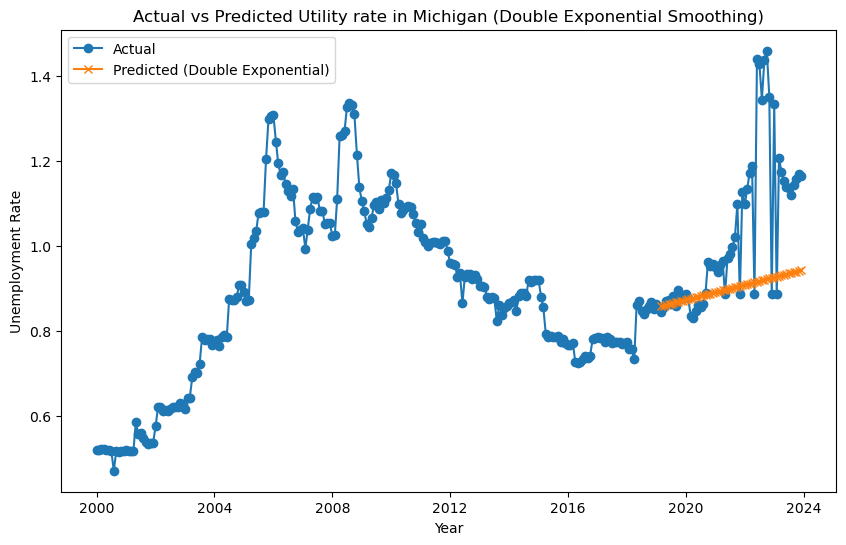

In [22]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Utility_Michigan'], label='Actual', marker='o')

# Plotting the predicted values for double exponential smoothing
plt.plot(test['Date'], predictions_double, label='Predicted (Double Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Utility rate in Michigan (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Utility_Texas**

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double exponential smoothing
model_double = ExponentialSmoothing(train['Utility_Texas'], trend='additive')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['Utility_Texas'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['Utility_Texas'] - predictions_double) / test['Utility_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 0.1874395922602556
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 87.17893271706441 %


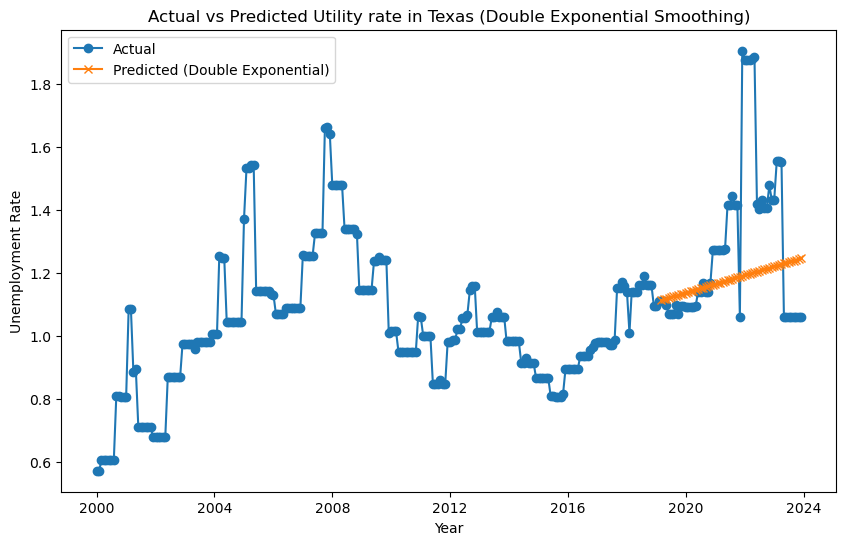

In [24]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Utility_Texas'], label='Actual', marker='o')

# Plotting the predicted values for double exponential smoothing
plt.plot(test['Date'], predictions_double, label='Predicted (Double Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Utility rate in Texas (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Gasoline_Michigan**

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double exponential smoothing
model_double = ExponentialSmoothing(train['Gasoline_Michigan'], trend='additive')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['Gasoline_Michigan'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['Gasoline_Michigan'] - predictions_double) / test['Gasoline_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 0.8183559606084558
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 75.89980513051437 %


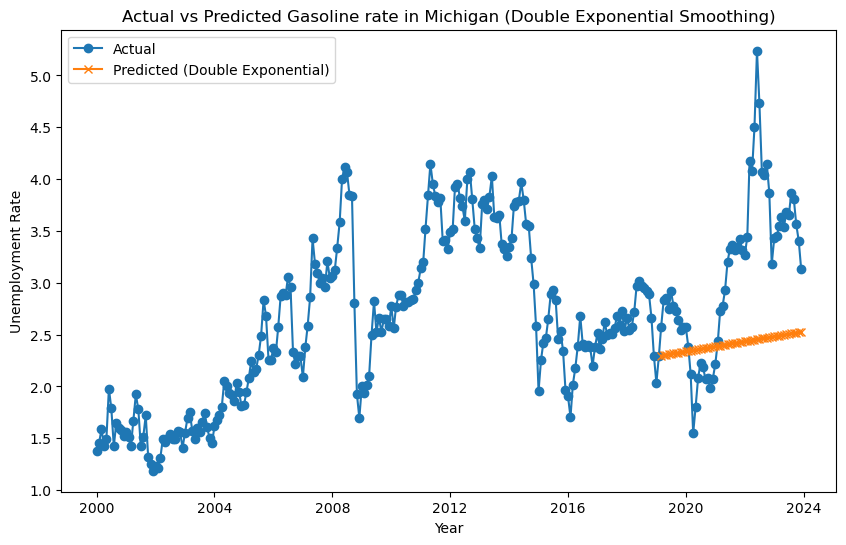

In [26]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Gasoline_Michigan'], label='Actual', marker='o')

# Plotting the predicted values for double exponential smoothing
plt.plot(test['Date'], predictions_double, label='Predicted (Double Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Gasoline rate in Michigan (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Gasoline_Texas**

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double exponential smoothing
model_double = ExponentialSmoothing(train['Gasoline_Texas'], trend='additive')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['Gasoline_Texas'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['Gasoline_Texas'] - predictions_double) / test['Gasoline_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 0.7651725060775357
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 74.78221143289845 %


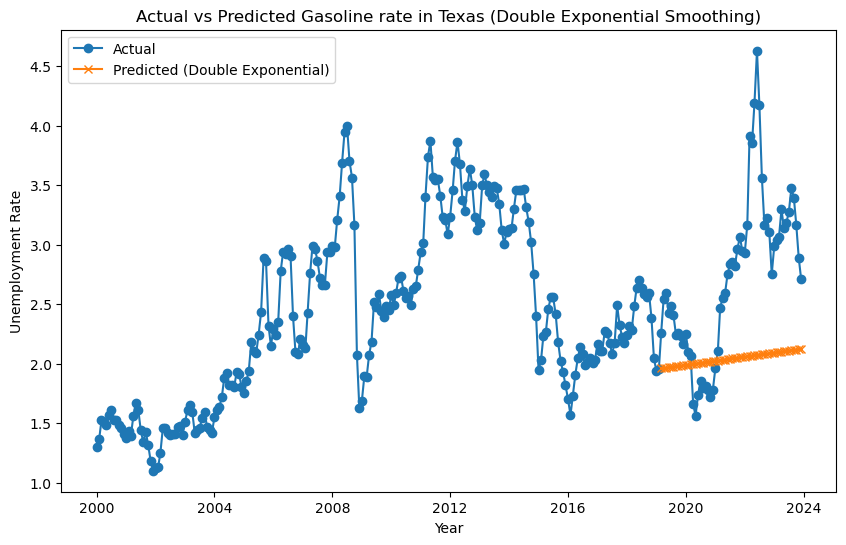

In [28]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Gasoline_Texas'], label='Actual', marker='o')

# Plotting the predicted values for double exponential smoothing
plt.plot(test['Date'], predictions_double, label='Predicted (Double Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Gasoline rate in Texas (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Electricity_Michigan**

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double exponential smoothing
model_double = ExponentialSmoothing(train['Electricity_Michigan'], trend='additive')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['Electricity_Michigan'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['Electricity_Michigan'] - predictions_double) / test['Electricity_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 0.025653772632151253
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 85.85670415515759 %


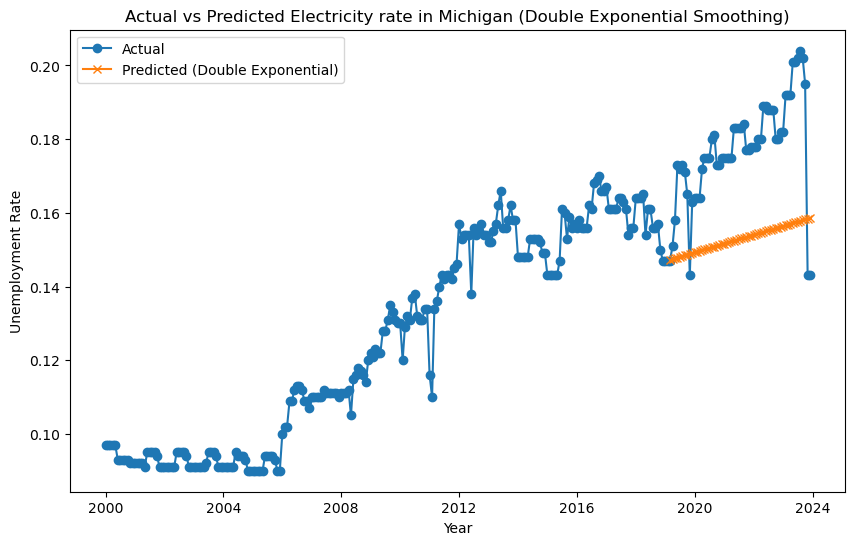

In [30]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Electricity_Michigan'], label='Actual', marker='o')

# Plotting the predicted values for double exponential smoothing
plt.plot(test['Date'], predictions_double, label='Predicted (Double Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Electricity rate in Michigan (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Electricity_Texas**

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double exponential smoothing
model_double = ExponentialSmoothing(train['Electricity_Texas'], trend='additive')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['Electricity_Texas'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['Electricity_Texas'] - predictions_double) / test['Electricity_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 0.01971850928212161
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 88.3941196440386 %


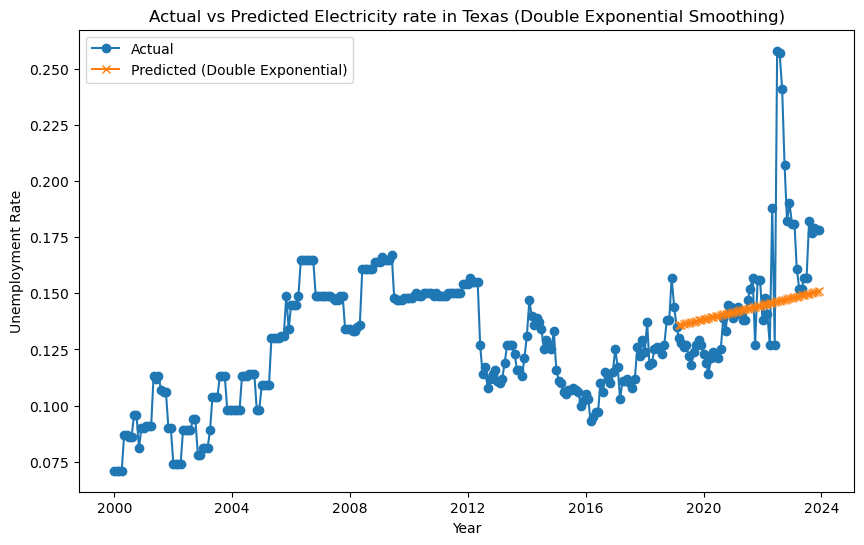

In [32]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Electricity_Texas'], label='Actual', marker='o')

# Plotting the predicted values for double exponential smoothing
plt.plot(test['Date'], predictions_double, label='Predicted (Double Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Electricity rate in Texas (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

## Triple Exponential Smoothening

**Utility_Michigan**

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['Utility_Michigan'], trend='additive', seasonal='additive', seasonal_periods=12)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['Utility_Michigan'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['Utility_Michigan'] - predictions_triple) / test['Utility_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")


Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 0.13559048227904852
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 88.6179084565824 %


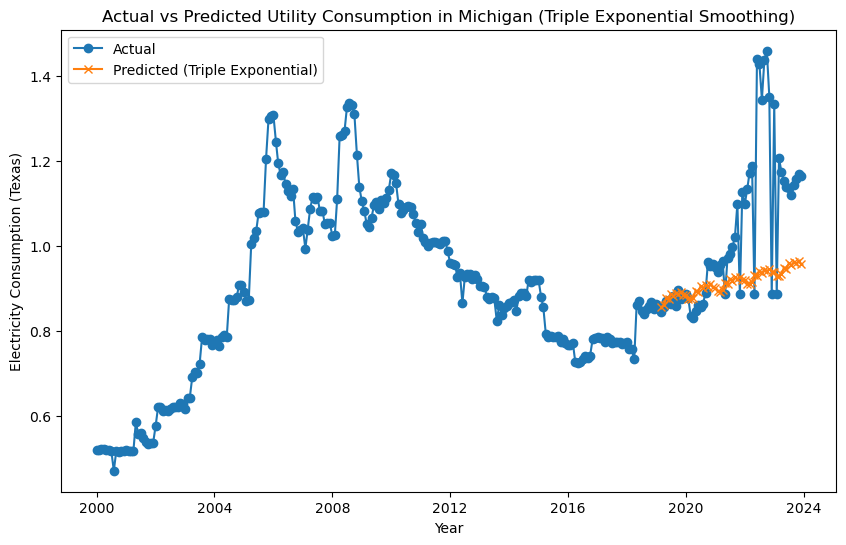

In [34]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Utility_Michigan'], label='Actual', marker='o')

# Plotting the predicted values for triple exponential smoothing
plt.plot(test['Date'], predictions_triple, label='Predicted (Triple Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Utility Consumption (Texas)')
plt.title('Actual vs Predicted Utility Consumption in Michigan (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()


**Utility_Texas**

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['Utility_Texas'], trend='additive', seasonal='additive', seasonal_periods=12)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['Utility_Texas'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['Utility_Texas'] - predictions_triple) / test['Utility_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 0.18870679580949157
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 87.17572290530453 %


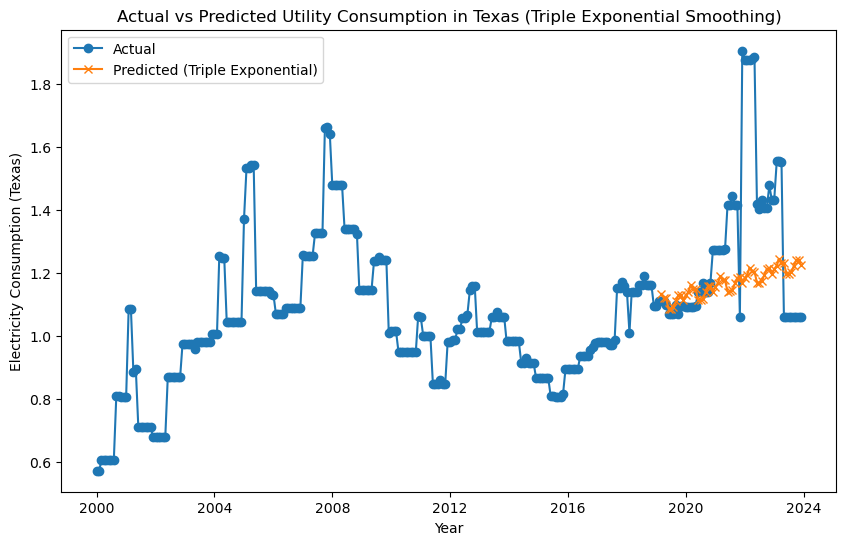

In [36]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Utility_Texas'], label='Actual', marker='o')

# Plotting the predicted values for triple exponential smoothing
plt.plot(test['Date'], predictions_triple, label='Predicted (Triple Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Utility Consumption (Texas)')
plt.title('Actual vs Predicted Utility Consumption in Texas (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()


**Gasoline_Michigan**

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['Gasoline_Michigan'], trend='additive', seasonal='additive', seasonal_periods=12)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['Gasoline_Michigan'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['Gasoline_Michigan'] - predictions_triple) / test['Gasoline_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 0.6990828792366132
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 78.53941648923383 %


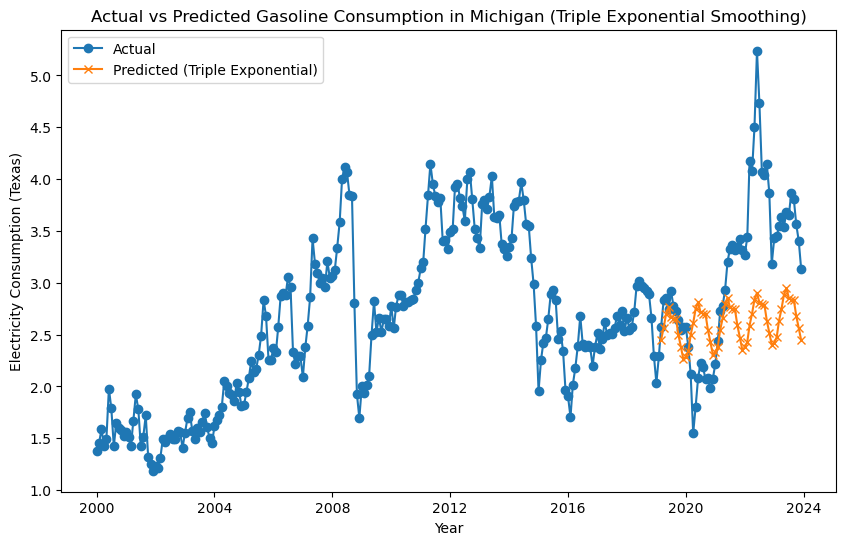

In [38]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Gasoline_Michigan'], label='Actual', marker='o')

# Plotting the predicted values for triple exponential smoothing
plt.plot(test['Date'], predictions_triple, label='Predicted (Triple Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Gasoline Consumption (Texas)')
plt.title('Actual vs Predicted Gasoline Consumption in Michigan (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Gasoline_Texas**

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['Gasoline_Texas'], trend='additive', seasonal='additive', seasonal_periods=12)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['Gasoline_Texas'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['Gasoline_Texas'] - predictions_triple) / test['Gasoline_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 0.6647777099745118
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 77.37770152839174 %


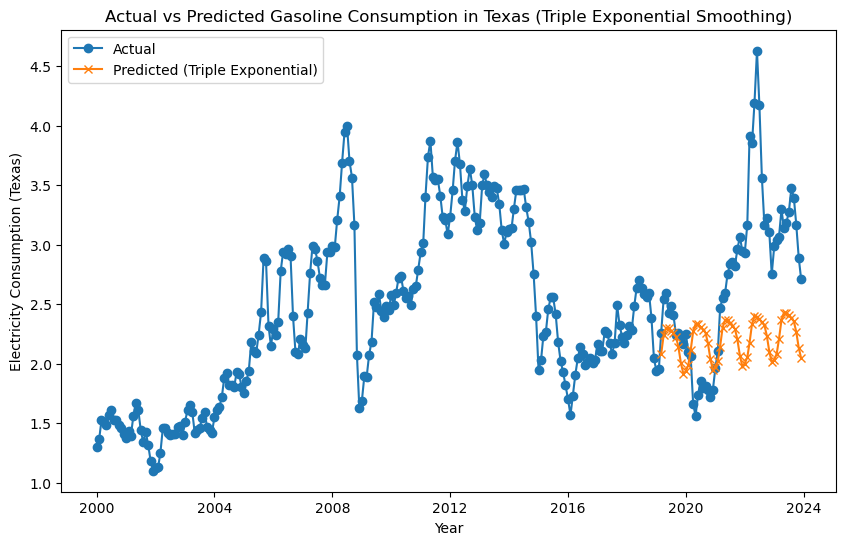

In [40]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Gasoline_Texas'], label='Actual', marker='o')

# Plotting the predicted values for triple exponential smoothing
plt.plot(test['Date'], predictions_triple, label='Predicted (Triple Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Gasoline Consumption (Texas)')
plt.title('Actual vs Predicted Gasoline Consumption in Texas (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Electricity_Michigan**

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['Electricity_Michigan'], trend='additive', seasonal='additive', seasonal_periods=12)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['Electricity_Michigan'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['Electricity_Michigan'] - predictions_triple) / test['Electricity_Michigan'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 0.022735373649912148
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 87.43984327283168 %


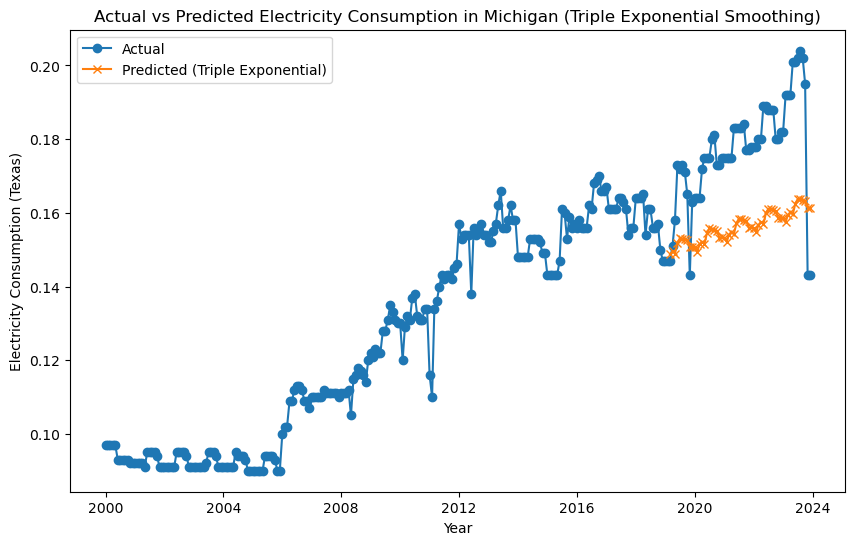

In [43]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Electricity_Michigan'], label='Actual', marker='o')

# Plotting the predicted values for triple exponential smoothing
plt.plot(test['Date'], predictions_triple, label='Predicted (Triple Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (Michigan)')
plt.title('Actual vs Predicted Electricity Consumption in Michigan (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

**Electricity_Texas**

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['Electricity_Texas'], trend='additive', seasonal='additive', seasonal_periods=12)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['Electricity_Texas'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['Electricity_Texas'] - predictions_triple) / test['Electricity_Texas'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 0.019780134777527356
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 88.1914316235009 %


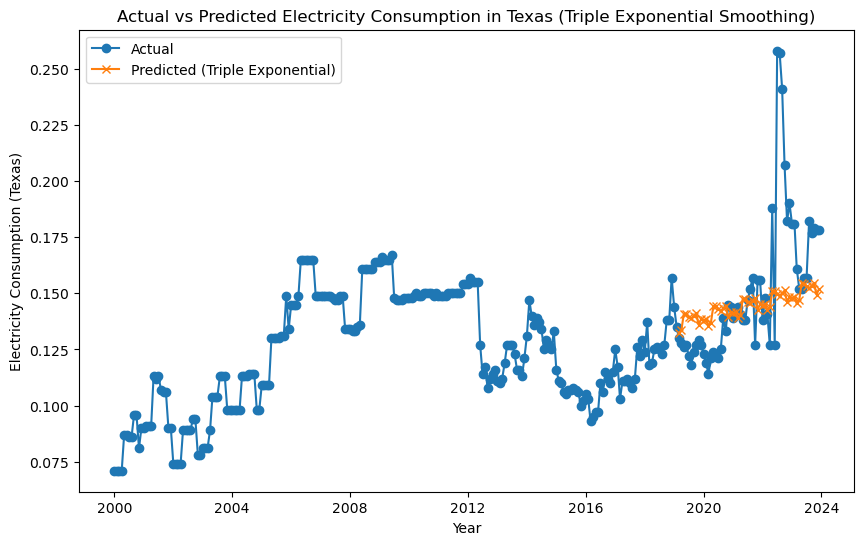

In [45]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Date'], df['Electricity_Texas'], label='Actual', marker='o')

# Plotting the predicted values for triple exponential smoothing
plt.plot(test['Date'], predictions_triple, label='Predicted (Triple Exponential)', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (Texas)')
plt.title('Actual vs Predicted Electricity Consumption in Texas (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()